<center>
    <img src='Pic/logo.jpg'>
    <h1>Môn học: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY(7080510)</h1>
    <h2>Bài Kiểm Tra Điểm B2</h2>
</center>

---

**Người thực hiện :**
---------------------------------
- Họ và tên: Trần Văn An
- Mã sinh viên: 1921050029
- Lớp : DCCTKH64A
- Nhóm : 200

---
Performer tranandeveloper@gmail.com  ---  An-Tran-2001 for github --- https: cvofantran.tk

**Yêu cầu :**
---------------------------------
**1. Data: Sinh viên sử dụng file dữ liệu đã được tiền xử lý và chuẩn hóa thực hiện trong bài thực hành số 4 (Data_B2.csv) bao gồm 961 bệnh nhân bị u vú.**

Mỗi bản ghi tương ứng với một bệnh nhân, Bao gồm 6 thuộc tính:
- PatienID: Thuộc tính cho biết mã số của bệnh nhân
- Age: Thuộc tính cho biết tuổi của bệnh nhân, dữ liệu số [18-96 tuổi]
- Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular
- Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated
- Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing
- Target: Thuộc tính cho biết khối u là lành tính (0) - hay ác tính (1)
> Sinh viên áp dụng các kỹ chuẩn hóa, tiền xử lý dữ liệu phù hợp cho tập dữ liệu này để có thể đưa vào các 
mô hình học máy (Xem lại phần bài thực hành số 4 trong Chương 2: Sinh viên đã thực hiện)

**2. Phân tách tập dữ liệu đã xử lý ra các biến Độc lập (X) - Phụ thuộc (Y) tương ứng**

**3. Chia tập dữ liệu thành 2 phần Train - Test với tỷ lệ 70%-30%**

**4. Xây dựng model dự đoán bệnh nhân bị bệnh u vú lành tính - ác tính với thuật toán cây quyết định (Decision Tree), Sử dụng model với các tham số mặc định để huấn luyện và kiểm thử trên Train – Test.**

Hiển thị các kết quả sau của model:
> a. Xác định và trực quan hóa độ quan trọng của các thuộc tính độc lập trong tập huấn luyện

> b. Hiển thị cây quyết định trên tập Huấn luyện

> c. Độ chính xác của model (accuracy) trên tập Train - Test

> d. Tổng số mẫu dự đoán đúng - sai trên tập Test

> e. Ma trận confusion matrix trên tập Test

**5. Bệnh nhân với các thông số như sau:**
- Age: 20 tuổi;
- Shape: Round;
- Margin: Circumscribed
- Density: Low

Sử dụng model ở trên dự đoán xem bệnh nhân này bị u lành tính (0) hay ác tính (1)

--------------

<center>
    <h1>Bài Giải</h1>
</center>

---------------

## **1.Kỹ thuật chuẩn hóa, tiền xử lý dữ liệu phù hợp cho tập dữ liệu này để đưa vào mô hình học máy**
----------------------------------------------------------------


In [87]:
#  import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import warnings
path = os.getcwd()
warnings.filterwarnings('ignore')

### 1.1) Tải tập dữ liệu:
---

In [88]:
#  đọc dữ liệu từ file csv vào dataframe với biến df_breast_cancer
df_breast_cancer = pd.read_csv(path + '/Data/Data_B2.csv')
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  961 non-null    object 
 1   Age        956 non-null    float64
 2   Shape      930 non-null    object 
 3   Margin     913 non-null    object 
 4   Density    885 non-null    object 
 5   Target     961 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 45.2+ KB


In [89]:
#  Hiển thị dữ liệu biến df
df_breast_cancer

,PatientID,Age,Shape,Margin,Density,Target
0,P1,67.0,Lobular,Spiculated,Low,1
1,P2,43.0,Round,Circumscribed,NaN,1
2,P3,58.0,Irregular,Spiculated,Low,1
3,P4,28.0,Round,Circumscribed,Low,0
4,P5,74.0,Round,Spiculated,NaN,1
...,...,...,...,...,...,...
956,P957,47.0,Oval,Circumscribed,Low,0
957,P958,56.0,Irregular,Spiculated,Low,1
958,P959,64.0,Irregular,Spiculated,Low,0
959,P960,66.0,Irregular,Spiculated,Low,1


In [90]:
#  Hiển thị 5 dòng đầu tiên của dữ liệu
df_breast_cancer.head()

,PatientID,Age,Shape,Margin,Density,Target
0,P1,67.0,Lobular,Spiculated,Low,1
1,P2,43.0,Round,Circumscribed,NaN,1
2,P3,58.0,Irregular,Spiculated,Low,1
3,P4,28.0,Round,Circumscribed,Low,0
4,P5,74.0,Round,Spiculated,NaN,1


In [91]:
#  Hiển thị 5 dòng cuối cùng của dữ liệu
df_breast_cancer.tail()

,PatientID,Age,Shape,Margin,Density,Target
956,P957,47.0,Oval,Circumscribed,Low,0
957,P958,56.0,Irregular,Spiculated,Low,1
958,P959,64.0,Irregular,Spiculated,Low,0
959,P960,66.0,Irregular,Spiculated,Low,1
960,P961,62.0,Lobular,Obscured,Low,0


### 1.2) Phân tích - Thống kê dữ liệu
---

In [92]:
# kiểm tra đặc trưng thống kê của dữ liệu
df_breast_cancer.describe()

,Age,Target
count,956.000000,961.000000
mean,55.487448,0.463059
std,14.480131,0.498893
min,18.000000,0.000000
25%,45.000000,0.000000
50%,57.000000,0.000000
75%,66.000000,1.000000
max,96.000000,1.000000


In [93]:
#  kiểm tra đăc trưng thống kê của dữ liệu với kiêu dữ liệu là object
df_breast_cancer.describe(include='O')

,PatientID,Shape,Margin,Density
count,961,930,913,885
unique,961,4,5,4
top,P1,Irregular,Circumscribed,Low
freq,1,400,357,798


In [94]:
#  kiểm tra các giá trị bị thiếu với hàm isnull()
df_breast_cancer.isnull().sum()

PatientID     0
Age           5
Shape        31
Margin       48
Density      76
Target        0
dtype: int64

In [95]:
#  Kiểm tra các giá trị bị thiếu với hàm isna()
df_breast_cancer.isna().sum()

PatientID     0
Age           5
Shape        31
Margin       48
Density      76
Target        0
dtype: int64

In [96]:
#  Kiểm tra chi tiết các giá trị bị thiếu với hàm viết thủ công missing_value 
def missing_values(df):
        mis_val = df.isnull().sum() # Tính tổng các giá trị bị thiếu
        mis_val_percent = 100 * df.isnull().sum() / len(df) # Tính phần trăm các giá trị bị thiếu
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) # Tạo bảng chứa các giá trị bị thiếu
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Số giá trị Missing', 1 : 'Tỷ lệ % missing'}) # Đổi tên cột
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Tỷ lệ % missing', ascending=False).round(2) # Sắp xếp giảm dần theo tỷ lệ % missing
        print ("File dữ liệu bao gồm có: " + str(df.shape[1]) + " cột.\n"      
            "Có " + str(mis_val_table_ren_columns.shape[0]) +
              " cột chứa missing values.") # In ra số cột có giá trị bị thiếu
        return mis_val_table_ren_columns # Trả về bảng chứa các giá trị bị thiếu

print('Số lượng missing data trong tập Train: \n') # In ra số lượng missing data trong tập Train
missing_values(df_breast_cancer) # Gọi hàm missing_value

Số lượng missing data trong tập Train: 

File dữ liệu bao gồm có: 6 cột.
Có 4 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99
Shape,31,3.23
Age,5,0.52


In [97]:
#  Hiển thị các giá trị bị thiếu của cột Density
df_breast_cancer[df_breast_cancer['Density'].isnull()]

,PatientID,Age,Shape,Margin,Density,Target
1,P2,43.0,Round,Circumscribed,NaN,1
4,P5,74.0,Round,Spiculated,NaN,1
19,P20,40.0,Round,NaN,NaN,0
22,P23,43.0,Round,NaN,NaN,0
26,P27,66.0,Round,Circumscribed,NaN,0
...,...,...,...,...,...,...
614,P615,46.0,NaN,Spiculated,NaN,1
627,P628,57.0,Oval,Circumscribed,NaN,0
665,P666,27.0,Oval,Circumscribed,NaN,0
677,P678,57.0,Irregular,ill-defined,NaN,1


In [98]:
#  Hiển thị các giá trị bị thiếu của cột Margin
df_breast_cancer[df_breast_cancer['Margin'].isnull()]

,PatientID,Age,Shape,Margin,Density,Target
5,P6,65.0,Round,NaN,Low,0
6,P7,70.0,NaN,NaN,Low,0
7,P8,42.0,Round,NaN,Low,0
12,P13,64.0,Round,NaN,Low,0
19,P20,40.0,Round,NaN,NaN,0
20,P21,66.0,NaN,NaN,High,1
22,P23,43.0,Round,NaN,NaN,0
27,P28,63.0,Lobular,NaN,Low,0
35,P36,77.0,Lobular,NaN,NaN,0
48,P49,42.0,NaN,NaN,Fat-containing,0


In [99]:
#  Hiển thị các giá trị bị thiếu của cột Shape
df_breast_cancer[df_breast_cancer['Shape'].isnull()]

,PatientID,Age,Shape,Margin,Density,Target
6,P7,70.0,NaN,NaN,Low,0
9,P10,60.0,NaN,Spiculated,High,1
20,P21,66.0,NaN,NaN,High,1
48,P49,42.0,NaN,NaN,Fat-containing,0
54,P55,53.0,NaN,Spiculated,Low,1
74,P75,70.0,NaN,ill-defined,NaN,1
83,P84,57.0,NaN,ill-defined,High,0
128,P129,52.0,NaN,ill-defined,NaN,0
157,P158,51.0,NaN,NaN,Low,0
163,P164,53.0,NaN,ill-defined,Low,0


In [100]:
#  Hiển thị các giá trị bị thiếu của cột Age
df_breast_cancer[df_breast_cancer['Age'].isnull()]

,PatientID,Age,Shape,Margin,Density,Target
443,P444,NaN,Irregular,Spiculated,Low,1
453,P454,NaN,Irregular,ill-defined,Low,1
683,P684,NaN,Lobular,Obscured,Low,1
884,P885,NaN,Irregular,ill-defined,Low,1
923,P924,NaN,Irregular,Obscured,Low,1


### 1.3) Phân tích, thống kê - xác định mức độ ảnh hưởng của các thuộc tính độc lập [Age, Shape, Margin, Density] tới thuộc tính phụ thuộc [Target] 
---

**a) Thuộc tính tuổi - Age:**
---
Age: Tuổi của bệnh nhân từ 18-96


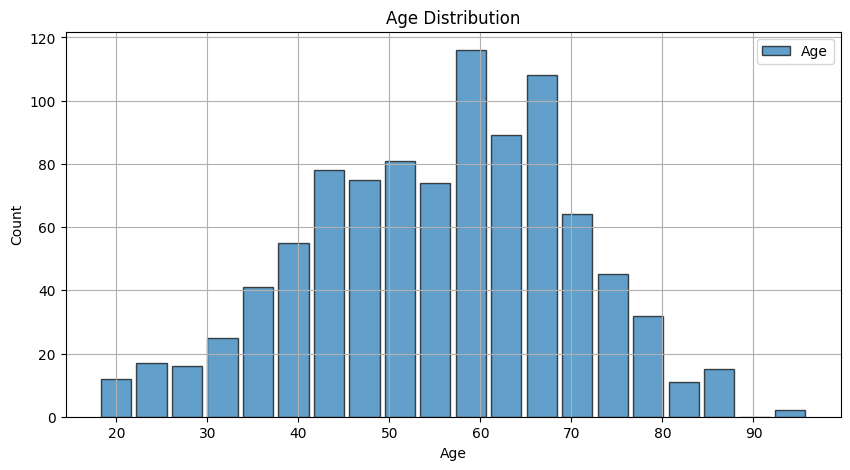

In [101]:
plt.figure(figsize=(10, 5))
plt.hist(df_breast_cancer['Age'], bins=20, edgecolor='black', alpha=0.7, rwidth=0.85, label='Age')
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.legend()
plt.show()

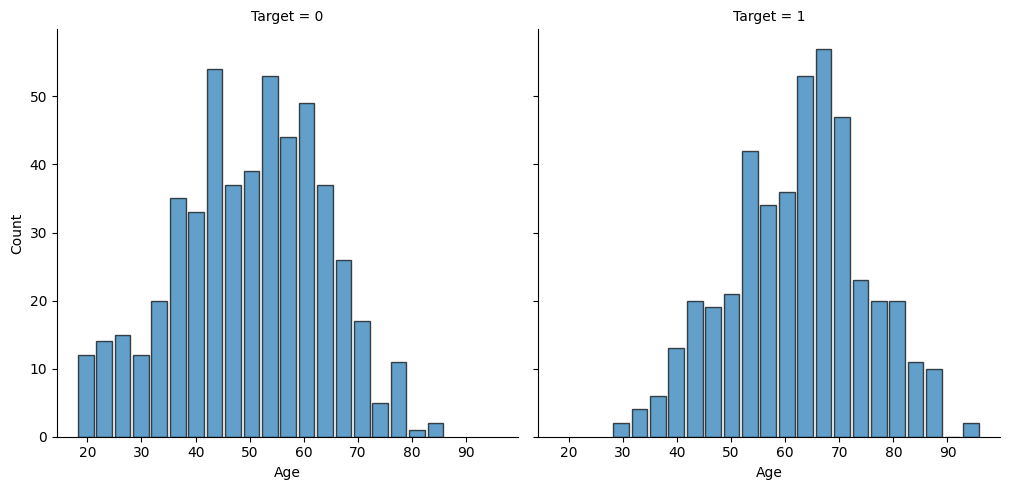

In [102]:
# Thống kê liệu bệnh nhân có bị ung thư hay không theo từng nhóm tuổi
g = sns.FacetGrid(df_breast_cancer, col='Target', height=5, aspect=1)
g.map(plt.hist, 'Age', bins=20, edgecolor='black',  alpha=0.7, rwidth=0.85)
g.set_axis_labels('Age', 'Count')
plt.show() 

Quan sát dữ liệu Tuổi:
*  Hầu hết các bệnh nhân đi khám nằm trong độ tuổi từ 45 - 75
*  Tỷ lệ người trung niên (Tuổi <45) tỷ lệ mắc lành tính cao hơn
*  Các bệnh nhân từ 80 tuổi trở lên mắc bệnh ác tính cao nhất đặc biệt hơn 90 tuổi đều mắc
*  Một lượng lớn bệnh nhân tuổi từ 60 - 70 đều mắc bệnh ác tính

Xem xét:

*  Thuộc tính Age ảnh hưởng tới khả năng bị mắc bệnh --> đưa vào mô hình huấn luyện
*  Xử lý một số dữ liệu missing của thuộc tính age

**b) Thuộc tính hình dạng khối u - Shape:**
---

Shape: hình dạng khối u gồn 4 giá trị (Round, Oval, Lobular, Irregular)

In [103]:
df_breast_cancer[['Shape', 'Target']].groupby(['Shape'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Shape,Target
0,Irregular,0.787500
1,Lobular,0.473684
3,Round,0.169643
2,Oval,0.165877


Shape: Có ảnh hưởng đến khả năng mắc u ác tính. Những người có khối u hình dạng Irregular có tỷ lệ mắc cao hơn những người khác

**c) Thuộc tính đường biên khối u - Margin:**
---

Shape: đường biên khối u gồm 5 giá trị (Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated)

In [104]:
df_breast_cancer[['Margin', 'Target']].groupby(['Margin'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Margin,Target
3,Spiculated,0.838235
4,ill-defined,0.682143
2,Obscured,0.629310
1,Microlobulated,0.625000
0,Circumscribed,0.114846


Margin: Ảnh hưởng cao tới khả năng mắc u ác tính. Các bệnh nhân có đường biên Spiculated khả năng mắc u ác tính cao tới ~73% và đường biên Circumscribed chỉ có khả năng mắc u ác tính là ~18% còn lại các đường biên khác đều có khả năng mắc u ác tính gần bằng nhau

**d) Thuộc tính mật độ khối u - Density:**
---

Shape: mật độ khối u gồm 4 gái trị (High, Iso, Low, Fat-containin)

In [105]:
df_breast_cancer[['Density', 'Target']].groupby(['Density'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Density,Target
3,Low,0.492481
1,High,0.437500
0,Fat-containing,0.416667
2,Iso,0.305085


Density: Ảnh hưởng đến khả năng mắc u ác tính cho thấy rõ không phải cứ có mât độ thấp(low) sẽ là u lành tính

s

### 1.4) Tiền xử lý dữ liệu 
---

#### a) Loại bỏ các thuộc tính không quan trọng
---
* Một số thuộc tính không|ít ảnh hưởng tới việc bệnh nhân mắc u ác tính hay lành tính, cần loại bỏ những thuộc tính này khỏi dữ liệu. Để giảm chiều dữ liệu và nâng cao chất lượng của dữ liệu huấn luyện.

* Có 1 thuộc tính duy nhất không ảnh hưởng|ít ảnh hưởng bao gồm:

    > PatienID : Mã số bệnh nhân (bỏ)

Lý do: Em không tin đỏ đen

In [106]:
#  Tạo lại dataframe loại bỏ các giá không cần thiết
df_breast_cancer = df_breast_cancer.drop(['PatientID'], axis=1)
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      956 non-null    float64
 1   Shape    930 non-null    object 
 2   Margin   913 non-null    object 
 3   Density  885 non-null    object 
 4   Target   961 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 37.7+ KB


#### b) Xử lý các thuộc tính missing value:
---
* Các mô hình học máy không làm việc được với các bản ghi chứa thuộc tính missing do đó cần phải được xử lý.

* Trong tập dữ liệu hiện tại có thuộc tính chứa giá trị missing, bao gồm:

    1. **Age:** Missing 5 bản ghi (chiếm 0.52%)
    2. **Shape:** Missing 31 bản ghi (chiếm 3.23%)
    3. **Margin:** Missing 48 bản ghi (chiếm 4.99%)
    4. **Density:** Missing 76 bản ghi (chiếm 7.91%)

In [107]:
missing_values(df_breast_cancer)

File dữ liệu bao gồm có: 5 cột.
Có 4 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99
Shape,31,3.23
Age,5,0.52


#### b - 1 ) Xử lý giá trị bị mất của thuộc tính Density:
---

In [108]:
#  Danh sách các bệnh nhân missing thuộc tính Density
df_breast_cancer[df_breast_cancer['Density'].isnull()]

,Age,Shape,Margin,Density,Target
1,43.0,Round,Circumscribed,NaN,1
4,74.0,Round,Spiculated,NaN,1
19,40.0,Round,NaN,NaN,0
22,43.0,Round,NaN,NaN,0
26,66.0,Round,Circumscribed,NaN,0
...,...,...,...,...,...
614,46.0,NaN,Spiculated,NaN,1
627,57.0,Oval,Circumscribed,NaN,0
665,27.0,Oval,Circumscribed,NaN,0
677,57.0,Irregular,ill-defined,NaN,1


In [109]:
#  Phân tích thuộc tính Density theo từng nhóm thuộc tính để kiểm tra target và gán vào biến condition_density để xử lý missing value (Tạo bộ liên kết giữa ccs giá trị margin và shape)
condition = df_breast_cancer[['Shape', 'Margin', 'Density', 'Target']].groupby(['Shape', 'Margin','Density'], as_index=False).mean().sort_values(by='Target', ascending=False)
condition

,Shape,Margin,Density,Target
21,Lobular,Spiculated,Low,1.000000
2,Irregular,Microlobulated,Iso,1.000000
42,Round,Spiculated,Low,1.000000
5,Irregular,Obscured,High,1.000000
20,Lobular,Spiculated,Iso,1.000000
8,Irregular,Spiculated,Fat-containing,1.000000
9,Irregular,Spiculated,Iso,1.000000
18,Lobular,Obscured,Iso,1.000000
12,Irregular,ill-defined,High,1.000000
17,Lobular,Microlobulated,Low,0.833333


In [110]:
#  Thống kê số lượng bệnh nhân theo từng nhóm giá trị Density
high_density = df_breast_cancer['Density'].value_counts().index[0] # lấy ra giá trị có số lượng lớn nhất
df_breast_cancer['Density'].value_counts()

Low               798
Iso                59
High               16
Fat-containing     12
Name: Density, dtype: int64

> Sau khi phân tích cho thấy với những nhóm các thuộc tính liên quan có khả năng dẫ đến target = 1 cao nhất.

> ==> Giải pháp thay thế missing: Thay thế missing Density với điều kiện thuộc các nhóm thuộc tính liên quan dẫn đến target = 1(Nhận thấy có ít giá trị thỏa mãn với target = 1 giải pháp lấy giá trị cao hơn 0.5) còn lại những thuốc tính ko thỏa mãn thay thế bằng giá trị xuất hiện nhiều nhất của Density (giá trị Low).

In [111]:
#  Xử lý missing value của riêng thuộc tính Density

# def fill_missing_value(df_condition, name_column, condition):
#     #  Lấy các giá trị của Density theo từng nhóm giá trị đã phân tích và lưu vào biến tạm thời với điều kiện là khả năng bị ung thư caohơn 0.5
#     tem = df_condition[(df_condition['Target'] > 0.5)]
#     for x,y,z,a in zip(tem['Shape'], tem['Margin'], tem['Density'], tem['Target']):
#         df_breast_cancer['Density'] = np.where((df_breast_cancer['Shape'] == x) & (df_breast_cancer['Margin'] == y) & (df_breast_cancer['Density'].isnull()), z, df_breast_cancer['Density']) # Chạy vòng for lấy các giá trị trong danh sách tạm thời phía trên thay thế giá trị cột với điều kiện
#     #  Xử lý gái trị còn lại của cột Density khi không thỏa mãn các điều kiện của biến tạm thời đã lưu phía trên
#     df_breast_cancer['Density'] = df_breast_cancer['Density'].fillna('Low')







#  Để tiện cho việc xử lý theo cách tìm bộ giá trị tương tự nhau thì e sẽ tạo một hàm để xử lý
#  hàm fill_missing_value sẽ nhận vào 6 tham số: df chính - df sau khi đã tìm ra bộ liên kết - tên cột cần xử lý - tên cột phụ thuộc - giá trị mong muốn - giá trị thay thế nếu ko có trong bộ liên kết
def fill_missing_value(df_main,df_condition, name_column, Dependency_columns,input_value_DepenCl, high_target):
    #  Lấy các giá trị của cột cần xử lý với điều kiện cột phụ thuộc lớn hơn giá trị monng muốn và lưu vào biến tạm thời
    temp = df_condition[(df_condition[Dependency_columns] > input_value_DepenCl)]
    temp = temp.drop([Dependency_columns], axis=1) # xóa cột phụ thuộc đi vì không cần thiết nữa
    for x,y,z in zip(temp[f'{temp.columns.values[0]}'], temp[f'{temp.columns.values[1]}'], temp[f'{temp.columns.values[2]}']): # chạy vòng for lấy các giá trị trong danh sách tạm thời theo cột và hàm columns.value lấy tên cột giả theo biến ở đây chỉ có tổng 4 cột kể cả cột phụ thuộc nên chỉ chạy đến 3
        if name_column == temp.columns.values[2]:
            df_main[name_column] = np.where((df_main[f'{temp.columns.values[0]}']  == x) & (df_main[f'{temp.columns.values[1]}'] == y) & (df_main[name_column].isnull()), z, df_breast_cancer[name_column]) # sử dụng numpy.where để thay thế giá trị cột với điều kiện
        elif name_column == temp.columns.values[1]:
            df_main[name_column] = np.where((df_main[f'{temp.columns.values[0]}']  == x) & (df_main[f'{temp.columns.values[2]}'] == z) & (df_main[name_column].isnull()), y, df_breast_cancer[name_column])
        elif name_column == temp.columns.values[0]:
            df_main[name_column] = np.where((df_main[f'{temp.columns.values[1]}']  == y) & (df_main[f'{temp.columns.values[2]}'] == z) & (df_main[name_column].isnull()), x, df_breast_cancer[name_column])
    #  Xử lý gái trị còn lại của cột Density khi không thỏa mãn các điều kiện của biến tạm thời đã lưu phía trên
    df_main[name_column] = df_main[name_column].fillna(high_target)



#  Set giá trị xếp xỉ của cột mong muốn vì đây là mô hình dự đoán u vú nên tốt nhất nên chọn các hệ số cao hơn 70%
TARGET_VALUE = 0.7
#  Gọi hàm xử lý missing value
fill_missing_value(df_breast_cancer, condition, 'Density', 'Target', TARGET_VALUE, high_density)


In [112]:
#  Kiểm tra lại các giá trị bị thiếu của cột Density
df_breast_cancer[df_breast_cancer['Density'].isnull()]

,Age,Shape,Margin,Density,Target


In [113]:
#  Kiểm tra hàm xử lý đã hoạt động chưa có giá trị ngoại lai nào vào ko
df_breast_cancer['Density'].value_counts()

Low               861
Iso                61
High               25
Fat-containing     14
Name: Density, dtype: int64

#### b - 2 ) Xử lý giá trị bị mất của thuộc tính Margin:
---

In [114]:
#  Danh sách các bệnh nhân missing thuộc tính Margin
df_breast_cancer[df_breast_cancer['Margin'].isnull()]

,Age,Shape,Margin,Density,Target
5,65.0,Round,NaN,Low,0
6,70.0,NaN,NaN,Low,0
7,42.0,Round,NaN,Low,0
12,64.0,Round,NaN,Low,0
19,40.0,Round,NaN,Low,0
20,66.0,NaN,NaN,High,1
22,43.0,Round,NaN,Low,0
27,63.0,Lobular,NaN,Low,0
35,77.0,Lobular,NaN,Low,0
48,42.0,NaN,NaN,Fat-containing,0


In [115]:
#  Thống kê số lượng bệnh nhân theo từng giá trị của cột Margin
high_margin = df_breast_cancer['Margin'].value_counts().index[0] # lấy ra giá trị có số lượng lớn nhất
df_breast_cancer['Margin'].value_counts()

Circumscribed     357
ill-defined       280
Spiculated        136
Obscured          116
Microlobulated     24
Name: Margin, dtype: int64

In [116]:
# Gọi hàm đã làm phía trên và bộ liên kết đã tìm được và xử lý missing value của cột Margin
fill_missing_value(df_breast_cancer, condition, 'Margin', 'Target', TARGET_VALUE, high_margin)

In [117]:
#  kiểm tra lại missing value của cột Margin
df_breast_cancer[df_breast_cancer['Margin'].isnull()]

,Age,Shape,Margin,Density,Target


In [118]:
#  Kiểm tra xem hàm đúng hay không bằng cách in ra các giá trị của cột Margin xem có giá trị ngoại lai nào ko
df_breast_cancer['Margin'].value_counts()

Circumscribed     378
ill-defined       280
Spiculated        163
Obscured          116
Microlobulated     24
Name: Margin, dtype: int64

#### b - 3 ) Xử lý giá trị bị mất của thuộc tính Shape:
---

In [119]:
#  Danh sách các bệnh nhân missing thuộc tính Shape
df_breast_cancer[df_breast_cancer['Shape'].isnull()]

,Age,Shape,Margin,Density,Target
6,70.0,NaN,Circumscribed,Low,0
9,60.0,NaN,Spiculated,High,1
20,66.0,NaN,Circumscribed,High,1
48,42.0,NaN,Circumscribed,Fat-containing,0
54,53.0,NaN,Spiculated,Low,1
74,70.0,NaN,ill-defined,Low,1
83,57.0,NaN,ill-defined,High,0
128,52.0,NaN,ill-defined,Low,0
157,51.0,NaN,Circumscribed,Low,0
163,53.0,NaN,ill-defined,Low,0


In [120]:
#  Thống kê số lượng bệnh nhân theo từng giá trị của cột Shape
high_shape = df_breast_cancer['Shape'].value_counts().index[0] # lấy ra giá trị có số lượng lớn nhất
df_breast_cancer['Shape'].value_counts()

Irregular    400
Round        224
Oval         211
Lobular       95
Name: Shape, dtype: int64

In [121]:
#  Gọi hàm đã làm phía trên và bộ liên kết đã tìm được và xử lý missing value của cột Shape
fill_missing_value(df_breast_cancer, condition, 'Shape', 'Target', TARGET_VALUE, high_shape)

In [122]:
#  Kiểm tra lại missing value của cột Shape
df_breast_cancer[df_breast_cancer['Shape'].isnull()]

,Age,Shape,Margin,Density,Target


In [123]:
#  Kiểm tra xem hàm đúng hay không bằng cách in ra các giá trị của cột Shape xem có giá trị ngoại lai nào ko
df_breast_cancer['Shape'].value_counts()

Irregular    426
Round        224
Oval         211
Lobular      100
Name: Shape, dtype: int64

#### b - 4 ) Xử lý giá trị bị mất của thuộc tính Age:
---

In [124]:
# Danh sách bệnh nhân missing thuộc tính Age
condition_age = df_breast_cancer[df_breast_cancer['Age'].isnull()]
condition_age

,Age,Shape,Margin,Density,Target
443,NaN,Irregular,Spiculated,Low,1
453,NaN,Irregular,ill-defined,Low,1
683,NaN,Lobular,Obscured,Low,1
884,NaN,Irregular,ill-defined,Low,1
923,NaN,Irregular,Obscured,Low,1


> Nhận thấy giá trị missing thuộc tính Age không quá lớn

> Tìm tất các tuộc tính giống nhất để thay vào Age

In [125]:
#  Lấy ra các giá trị Age với điều kiện tính mean và fill vào các giá trị missing của cột Age
for x, y, z, k, l in zip(condition_age['Age'], condition_age['Target'], condition_age['Shape'], condition_age['Margin'], condition_age['Density']):
    temp = df_breast_cancer[(df_breast_cancer['Target'] == y) & (df_breast_cancer['Shape'] == z) & (df_breast_cancer['Margin'] == k) & (df_breast_cancer['Density'] == l)]
    df_breast_cancer['Age'] = np.where((df_breast_cancer['Target'] == y) & (df_breast_cancer['Shape'] == z) & (df_breast_cancer['Margin'] == k) & (df_breast_cancer['Density'] == l) & (df_breast_cancer['Age'].isnull()), round(temp['Age'].mean(),0), df_breast_cancer['Age'])

In [126]:
#  xem lại các bệnh nhân missing value cột Age đã thay thế
condition_age.index
df_breast_cancer.loc[condition_age.index]

,Age,Shape,Margin,Density,Target
443,63.0,Irregular,Spiculated,Low,1
453,64.0,Irregular,ill-defined,Low,1
683,68.0,Lobular,Obscured,Low,1
884,64.0,Irregular,ill-defined,Low,1
923,63.0,Irregular,Obscured,Low,1


In [127]:
df_breast_cancer[df_breast_cancer['Age'].isnull()]

,Age,Shape,Margin,Density,Target


In [128]:
missing_values(df_breast_cancer)

File dữ liệu bao gồm có: 5 cột.
Có 0 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing


### 1.5) Rời rạc hóa và chuyển dữ liệu về dạng số
---

**a) Rời rạc hóa dữ liệu**
---

In [129]:
#  Tính tỷ lệ bệnh nhân bị ung thư theo từng khoảng tuổi
n = 5
df_temp = df_breast_cancer.copy()
df_temp['AgeBand'] = pd.cut(df_temp['Age'],  n)
df_temp[['AgeBand', 'Target']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Target
0,"(17.922, 33.6]",0.057143
1,"(33.6, 49.2]",0.269076
2,"(49.2, 64.8]",0.458791
3,"(64.8, 80.4]",0.728000
4,"(80.4, 96.0]",0.892857


**Thấy rằng tỷ lệ mắc ung thư ác tính có quan hệ thao độ tuổi. Thực hiện chia độ tuổi thành đoạn**
- Từ 17 - 34 : --> Age = 0
- Từ 33 - 49 : --> Age = 1
- Từ 49 - 64 : --> Age = 2
- Từ 64 - 80 : --> Age = 3
- lớn hơn 80 : --> Age = 4

In [130]:
df_breast_cancer.loc[df_breast_cancer['Age'] <= 34, 'Age'] = 0
df_breast_cancer.loc[(df_breast_cancer['Age'] > 34) & (df_breast_cancer['Age'] <= 49), 'Age'] = 1
df_breast_cancer.loc[(df_breast_cancer['Age'] > 49) & (df_breast_cancer['Age'] <= 64), 'Age'] = 2
df_breast_cancer.loc[(df_breast_cancer['Age'] > 64) & (df_breast_cancer['Age'] <= 80), 'Age'] = 3
df_breast_cancer.loc[df_breast_cancer['Age'] > 80, 'Age'] = 4

In [131]:
df_breast_cancer['Age'] = df_breast_cancer['Age'].astype(int)
df_breast_cancer

,Age,Shape,Margin,Density,Target
0,3,Lobular,Spiculated,Low,1
1,1,Round,Circumscribed,Low,1
2,2,Irregular,Spiculated,Low,1
3,0,Round,Circumscribed,Low,0
4,3,Round,Spiculated,Low,1
...,...,...,...,...,...
956,1,Oval,Circumscribed,Low,0
957,2,Irregular,Spiculated,Low,1
958,2,Irregular,Spiculated,Low,0
959,3,Irregular,Spiculated,Low,1


**b) Chuyển đổi các dữ liệu khác về dạng số**
---

**Chuyển đổi Shape với các giá trị :**

- Irregular = 0
- Round = 1
- Oval = 2
- Lobular = 3

In [132]:
df_breast_cancer['Shape'].value_counts()

Irregular    426
Round        224
Oval         211
Lobular      100
Name: Shape, dtype: int64

In [133]:
df_breast_cancer['Shape'] = df_breast_cancer['Shape'].map( {'Irregular': 0, 'Round': 1, 'Oval': 2, 'Lobular': 3} ).astype(int)
df_breast_cancer.head()

,Age,Shape,Margin,Density,Target
0,3,3,Spiculated,Low,1
1,1,1,Circumscribed,Low,1
2,2,0,Spiculated,Low,1
3,0,1,Circumscribed,Low,0
4,3,1,Spiculated,Low,1


**Chuyển đổi Margin với các giá trị :**
- Circumscribed   = 0
- ill-defined     = 1
- Spiculated      = 2
- Obscured        = 3
- Microlobulated  = 4

In [134]:
df_breast_cancer['Margin'].value_counts()

Circumscribed     378
ill-defined       280
Spiculated        163
Obscured          116
Microlobulated     24
Name: Margin, dtype: int64

In [135]:
df_breast_cancer['Margin'] = df_breast_cancer['Margin'].map( {'Circumscribed': 0, 'ill-defined': 1, 'Spiculated': 2, 'Obscured': 3, 'Microlobulated': 4} ).astype(int)
df_breast_cancer.head()

,Age,Shape,Margin,Density,Target
0,3,3,2,Low,1
1,1,1,0,Low,1
2,2,0,2,Low,1
3,0,1,0,Low,0
4,3,1,2,Low,1


**Chuyển đổi Density với các giá trị :**
- Low        =       0
- Iso         =       1
- High         =      2
- Fat-containing =    3

In [136]:
df_breast_cancer['Density'].value_counts()

Low               861
Iso                61
High               25
Fat-containing     14
Name: Density, dtype: int64

In [137]:
df_breast_cancer['Density'] = df_breast_cancer['Density'].map( {'Low': 0, 'Iso': 1, 'High': 2, 'Fat-containing': 3} ).astype(int)
df_breast_cancer.head()

,Age,Shape,Margin,Density,Target
0,3,3,2,0,1
1,1,1,0,0,1
2,2,0,2,0,1
3,0,1,0,0,0
4,3,1,2,0,1


**Lưu file đã xử lý**

---

In [138]:
df_breast_cancer.to_csv(path + '\Data\Data_B2_Ok.csv', index=False)

## **2.Phân tách tập dữ liệu đã xử lý ra các biến Độc lập (X) - Phụ thuộc (Y) tương ứng** 
----------------------------------------------------------------

In [139]:
#  đọc tiếp tục biến đã xử lý hoặc import lại từ file csv
df_breast_cancer = pd.read_csv(path + '\Data\Data_B2_Ok.csv')

#  Tách biến độc lập và biến phụ thuộc
#  Sử dụng drop hoặc iloc để tách biến độc lập và biến phụ thuộc

# X_breast_cancer = df_breast_cancer.drop(['Target'], axis=1)
# y_breast_cancer = df_breast_cancer['Target']

X_breast_cancer = df_breast_cancer.iloc[:, :4].values
y_breast_cancer = df_breast_cancer.iloc[:, -1].values

print('Kích thước biến độc lập X(features):', X_breast_cancer.shape)
print('Kích thước biến phụ thuộc y(target)   :', y_breast_cancer.shape)

Kích thước biến độc lập X(features): (961, 4)
Kích thước biến phụ thuộc y(target)   : (961,)


In [140]:
#  Hiển thị thử một vài mẫu
print('Bộ dữ liệu 1)  ', X_breast_cancer[1,:], '--',y_breast_cancer[1])
print('Bộ dữ liệu 55) ', X_breast_cancer[55,:], '--',y_breast_cancer[55])
print('Bộ dữ liệu 111)', X_breast_cancer[111,:], '--',y_breast_cancer[111])

Bộ dữ liệu 1)   [1 1 0 0] -- 1
Bộ dữ liệu 55)  [1 3 1 0] -- 0
Bộ dữ liệu 111) [3 0 1 0] -- 1


## **3. Chia tập dữ liệu thành 2 phần Train - Test với tỷ lệ 70%-30%** 
----------------------------------------------------------------


In [141]:
#  test_size: tỉ lệ dữ liệu test 0.3 = 30% - bộ dữ liệu có gần 1000 bản ghi nên random_state = 50 để đảm bảo độ chính xác
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_breast_cancer, y_breast_cancer, test_size=0.3, random_state=50)

print('Kích thước tập train:', len(y_train))
print('Kích thước tập test :', len(y_test))

Kích thước tập train: 672
Kích thước tập test : 289


In [142]:
y_train

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,

In [143]:
y_test

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1], dtype=int64)

## **4. Xây dựng model dự đoán bệnh nhân bị bệnh u vú lành tính - ác tính với thuật toán cây quyết định (Decision Tree), Sử dụng model với các tham số mặc định để huấn luyện và kiểm thử trên Train – Test.**
----------------------------------------------------------------

Hiển thị các kết quả sau của model:
> a. Xác định và trực quan hóa độ quan trọng của các thuộc tính độc lập trong tập huấn luyện

> b. Hiển thị cây quyết định trên tập Huấn luyện

> c. Độ chính xác của model (accuracy) trên tập Train - Test

> d. Tổng số mẫu dự đoán đúng - sai trên tập Test

> e. Ma trận confusion matrix trên tập Test

In [144]:
#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeClassifier

#Khai báo model Decision Tree sử dụng các tham số mặc định
model_tree = DecisionTreeClassifier()

#Các tham số của model DecisionTree
print('DANH SÁC CÁC THAM SỐ CỦA MODEL:')
model_tree.get_params()

DANH SÁC CÁC THAM SỐ CỦA MODEL:


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [145]:
# Huấn luyện mô hình với dữ liệu huấn luyện
modul_tree_breast_cancer = model_tree.fit(X_train, y_train)
modul_tree_breast_cancer

DecisionTreeClassifier()

In [146]:
print("Độ chính xác của tập huấn luyện:",round(model_tree.score(X_train, y_train)*100,2))

Độ chính xác của tập huấn luyện: 81.85


 > ### a. Xác định và trực quan hóa độ quan trọng của các thuộc tính độc lập trong tập huấn luyện
---

In [147]:
#  Đặt tên cho các thuộc tính
feature_names = ['Age', 'Shape', 'Margin', 'Density']
target_names = ['Benign', 'Malignant']

Mức độ quan trọng của các thuộc tính độc lập:
['Age', 'Shape', 'Margin', 'Density']
[0.17906683 0.15323571 0.60677602 0.06092144]


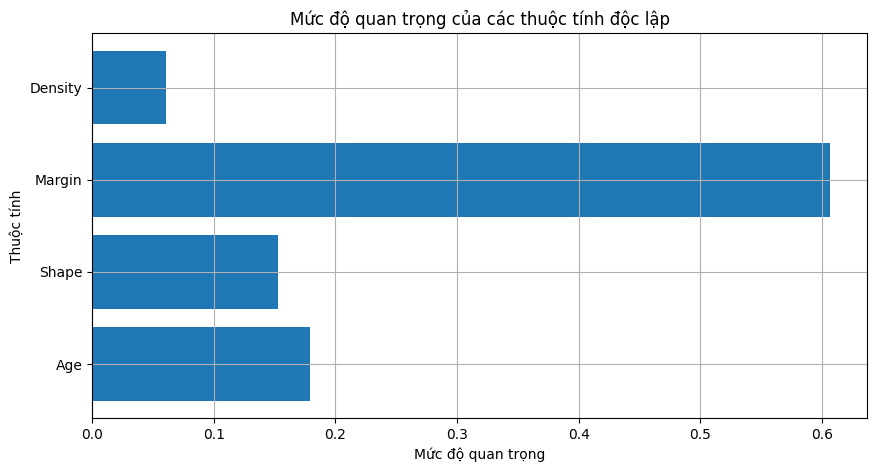

In [148]:
#  Xác định mưucs độ quan trọng của các thuộc tính độc lập
print('Mức độ quan trọng của các thuộc tính độc lập:')
print(feature_names)
print(model_tree.feature_importances_)

# Trưc quan hóa 
plt.figure(figsize=(10, 5))
plt.barh(feature_names, model_tree.feature_importances_)
plt.title('Mức độ quan trọng của các thuộc tính độc lập')
plt.xlabel('Mức độ quan trọng')
plt.ylabel('Thuộc tính')
plt.grid(True)
plt.show()

> ### b. Hiển thị cây quyết định trên tập Huấn luyện
---

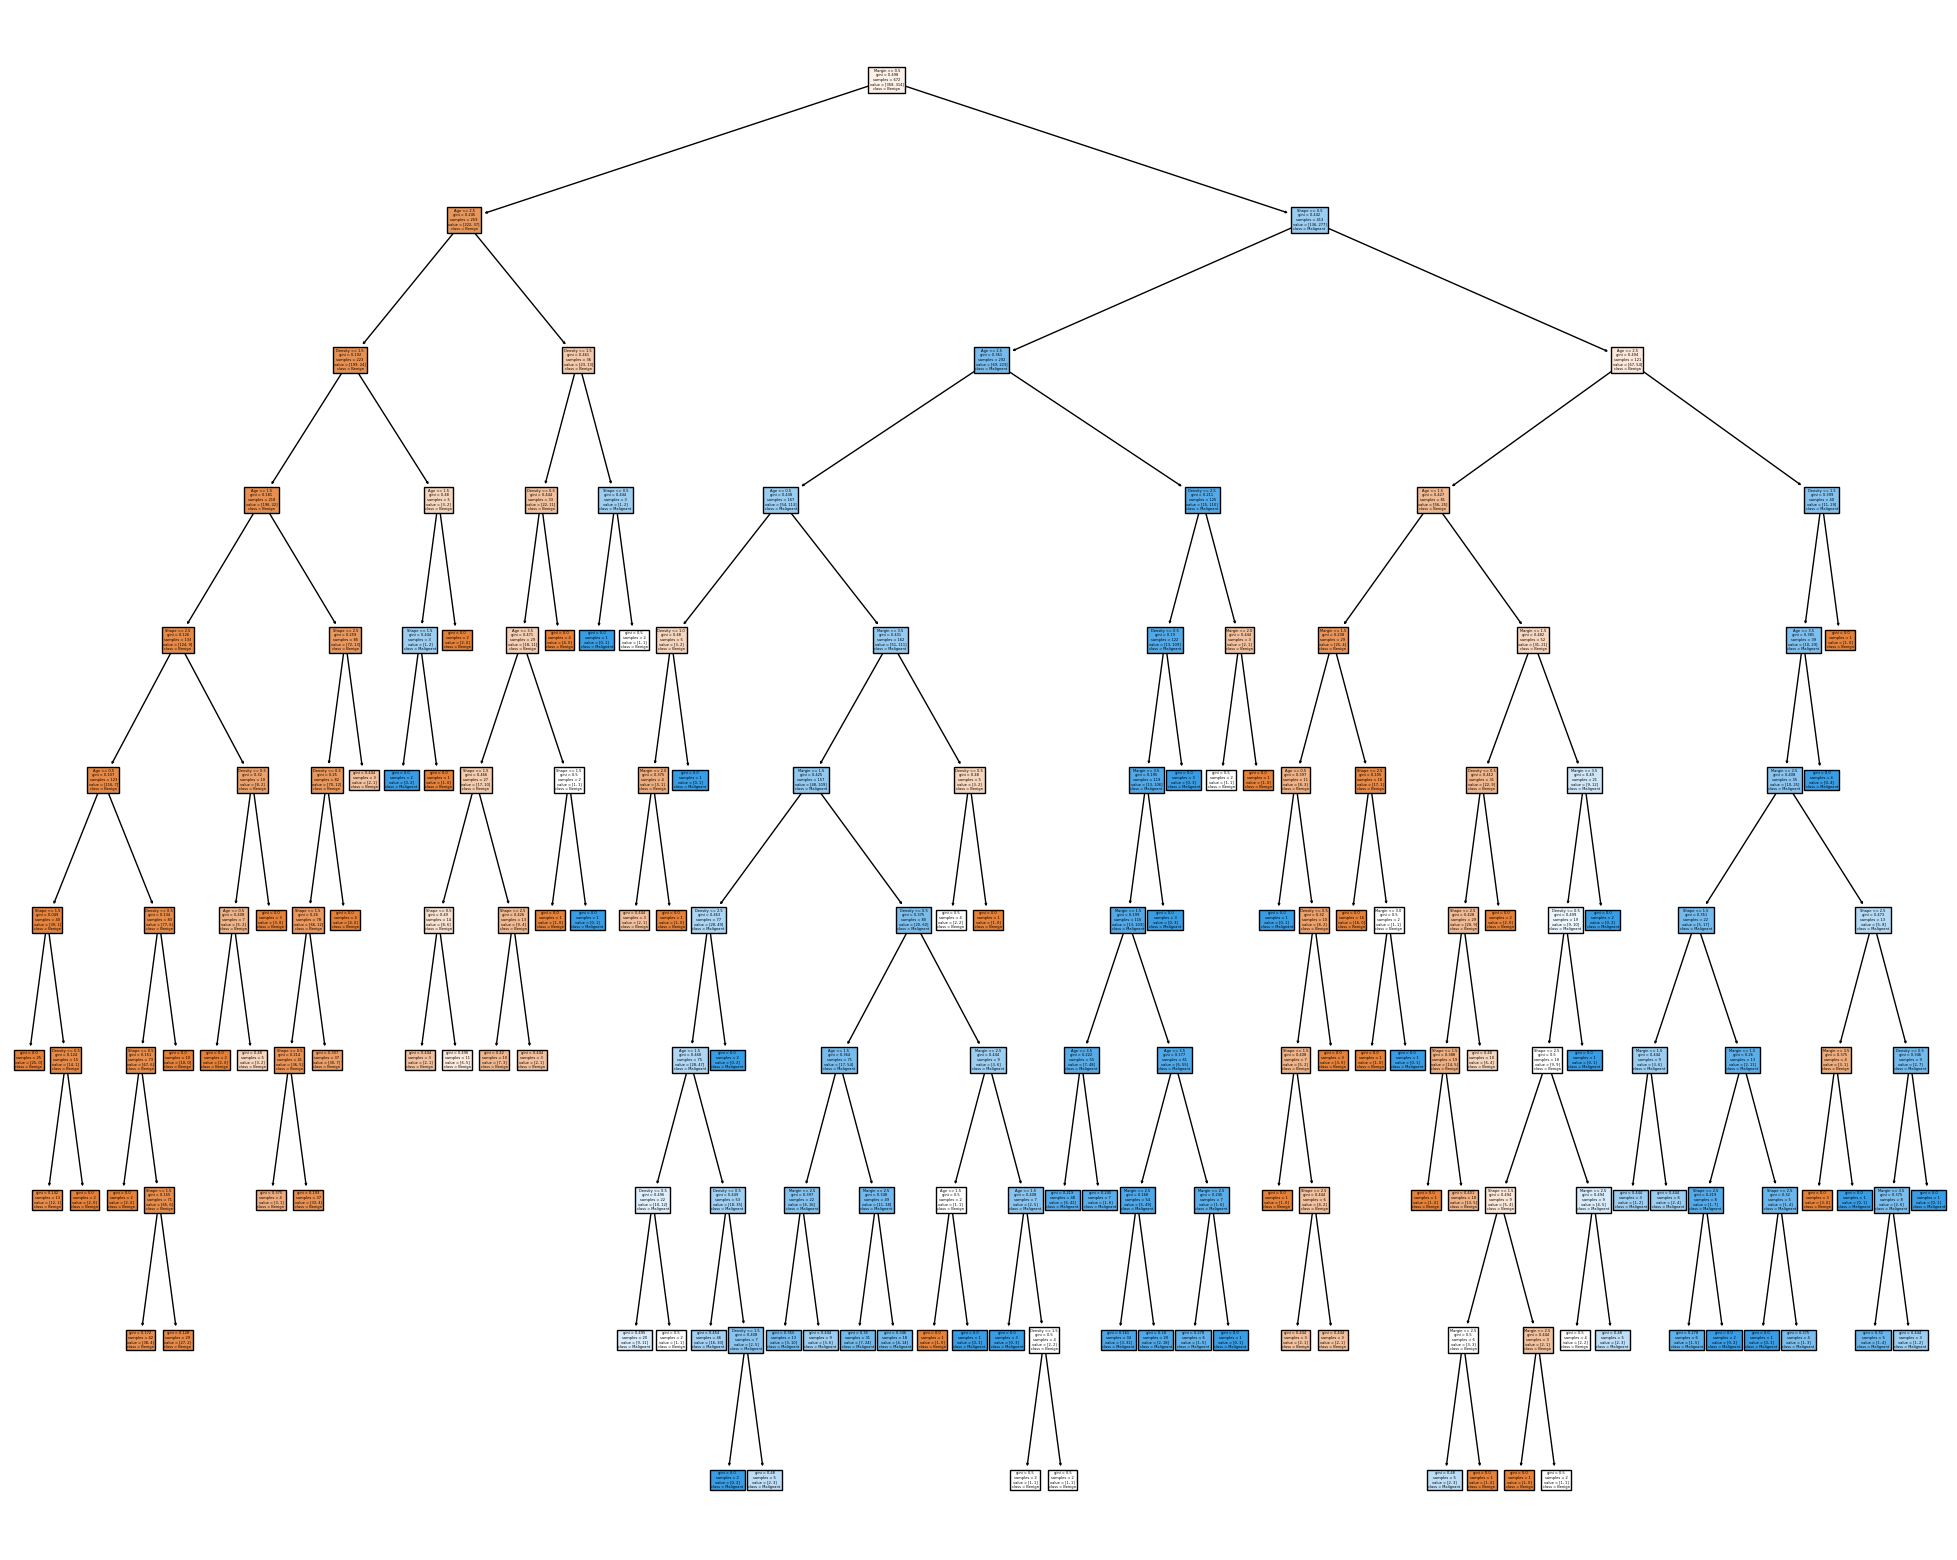

In [149]:
from sklearn import tree
plt.figure(figsize=(25, 20))
tree.plot_tree(model_tree, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()

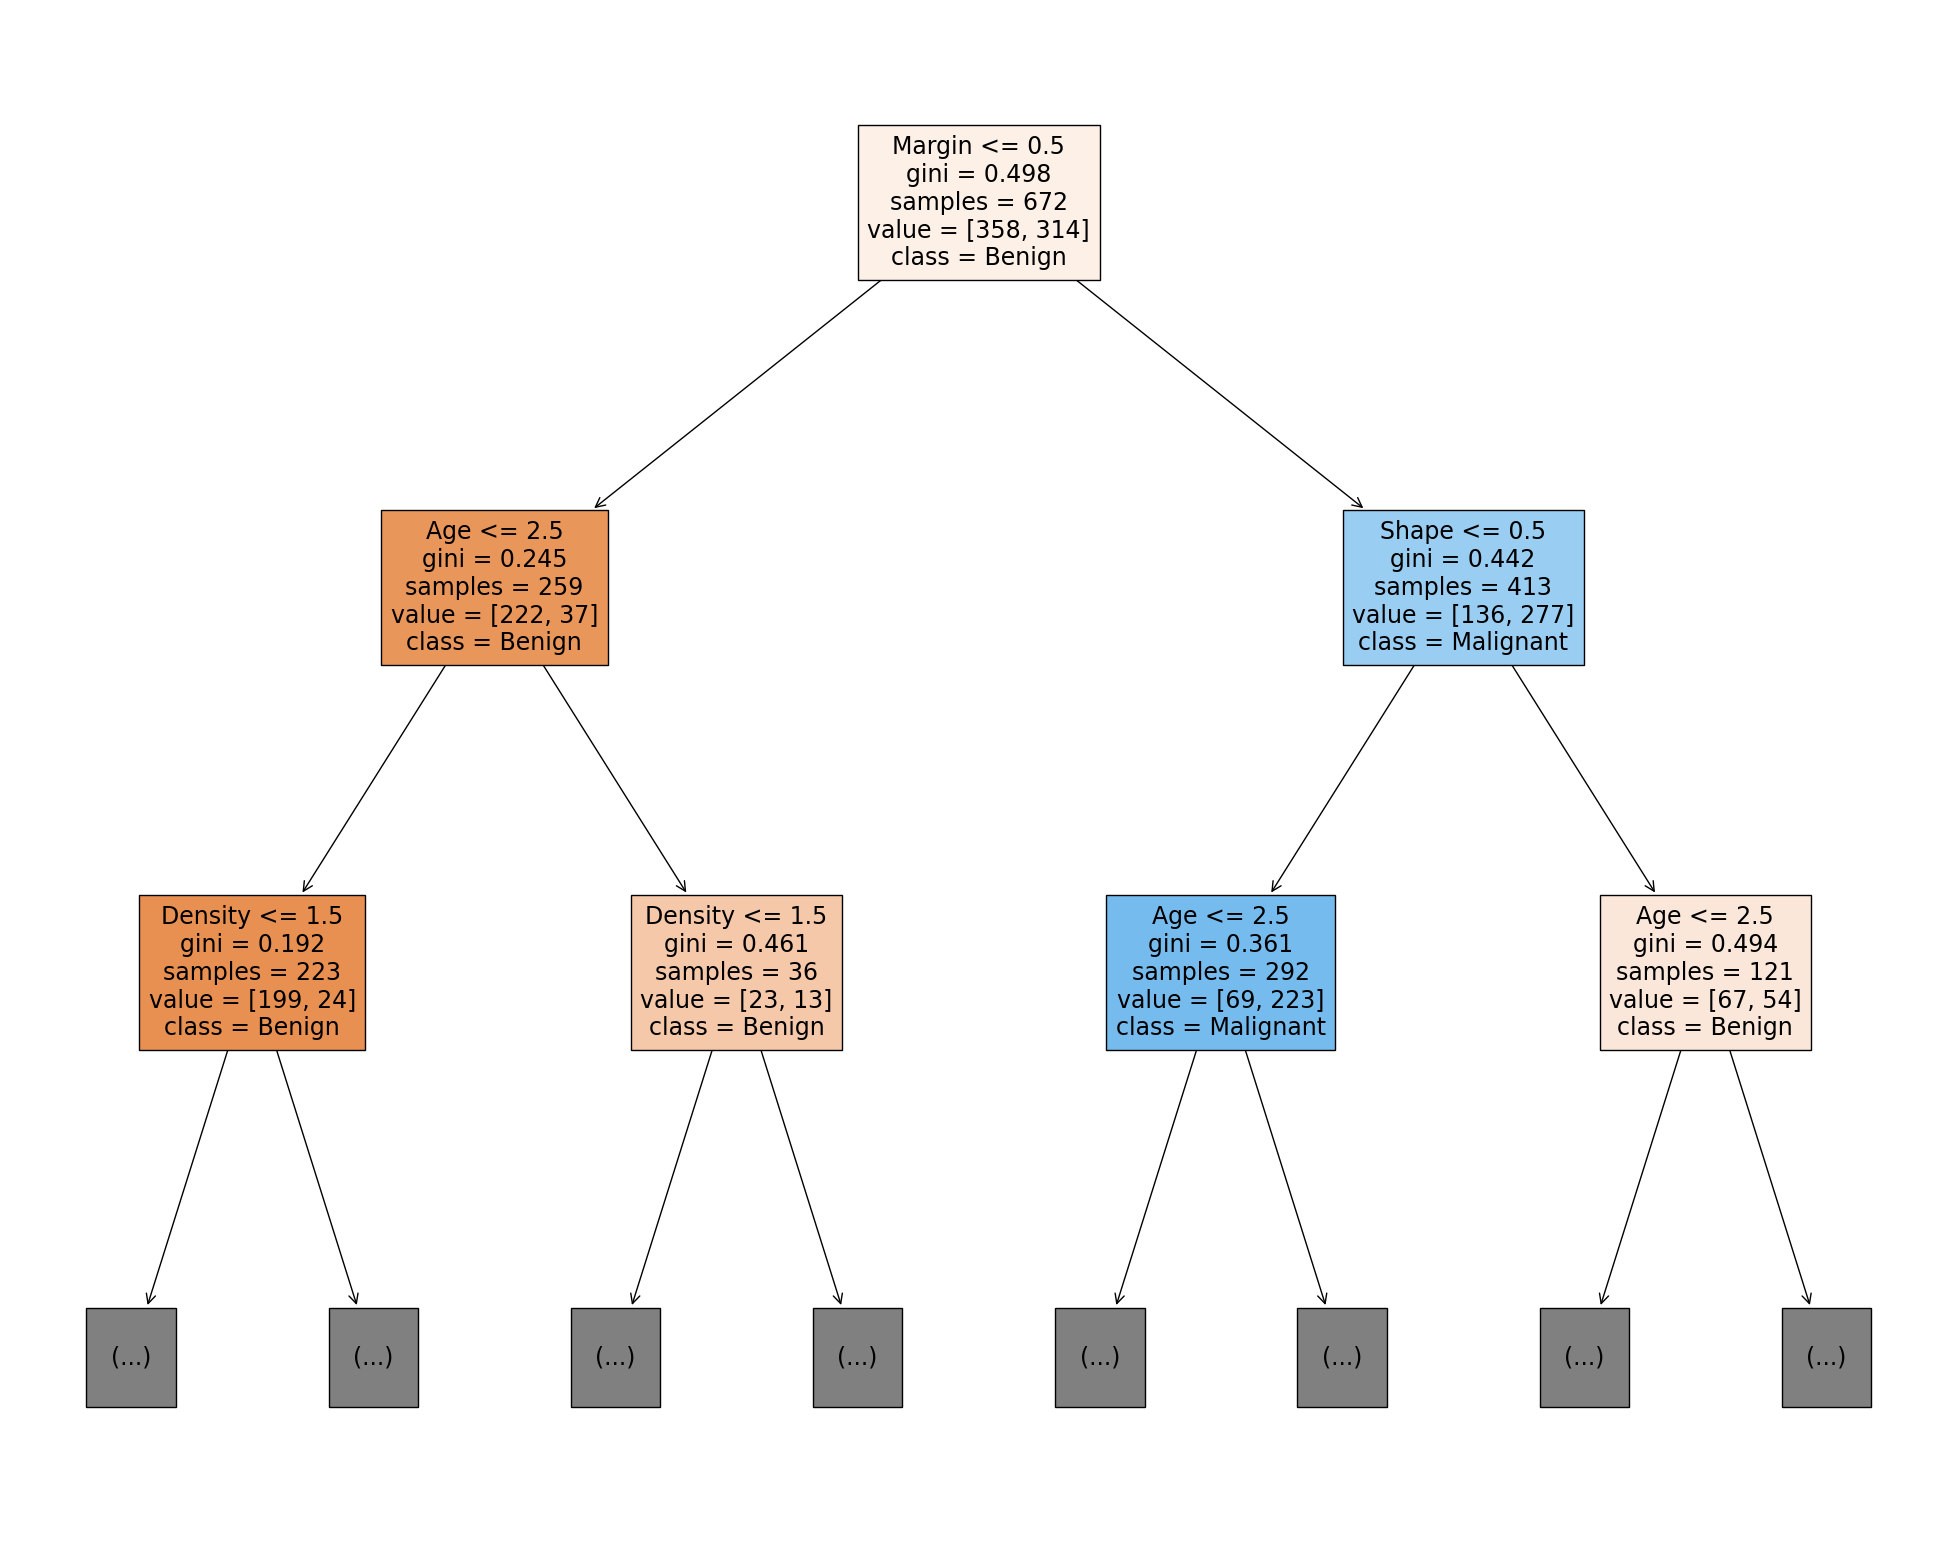

In [150]:
#  Hiển thị mấy nhánh đầu
plt.figure(figsize=(25, 20))
tree.plot_tree(model_tree, feature_names=feature_names, class_names=target_names, filled=True, max_depth=2)
plt.show()

> ### c. Độ chính xác của model (accuracy) trên tập Train - Test
---

In [151]:
#  độ chính xác của mô hình trên tập train
accuracy_train = round(model_tree.score(X_train, y_train)*100,2)
print(f'Độ chính xác của mô hình trên tập train: {accuracy_train}% ')

Độ chính xác của mô hình trên tập train: 81.85% 


In [152]:
#  Độ chính xác của mô hình trên tập test
accuracy_test = round(model_tree.score(X_test, y_test)*100,2)
print(f'Độ chính xác của mô hình trên tập test: {accuracy_test}% ')

Độ chính xác của mô hình trên tập test: 79.58% 


> ### d. Tổng số mẫu dự đoán đúng - sai trên tập Test
---

In [153]:
#  Tổng số mẫu dự đoán đúng trên tập test
y_pred = model_tree.predict(X_test)
print(f'Tổng số mẫu dự đoán đúng trên tập test: {sum(y_pred == y_test)} / {len(y_test)}')

Tổng số mẫu dự đoán đúng trên tập test: 230 / 289


In [154]:
#  Tổng số mẫu dự đoán sai trên tập test
print(f'Tổng số mẫu dự đoán sai trên tập test: {sum(y_pred != y_test)}/{len(y_test)}')

Tổng số mẫu dự đoán sai trên tập test: 59/289


In [155]:
#  cách của thầy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc_num = accuracy_score(y_test, y_pred, normalize=False)
print("Độ chính xác của mô hình trên tập TEST:", round(acc*100,2), '%')
print("Tổng số mẫu dự đoán đúng:",acc_num, '/', len(y_test))


Độ chính xác của mô hình trên tập TEST: 79.58 %
Tổng số mẫu dự đoán đúng: 230 / 289


> ### e. Ma trận confusion matrix trên tập Test
---

<Figure size 500x500 with 0 Axes>

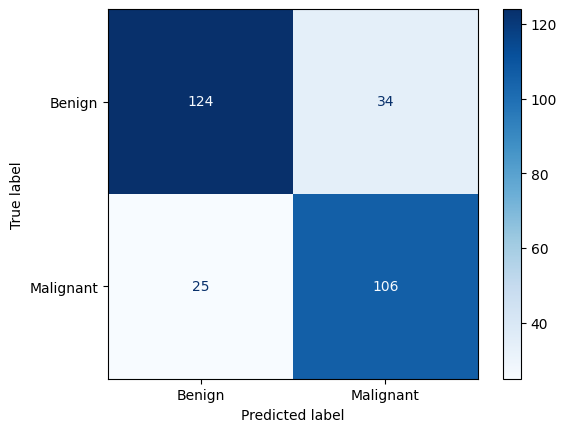

In [156]:
#  Hiển thị confusion matrix trên tập test
from sklearn.metrics import plot_confusion_matrix 

#  Hiển thị theo số liệu
plt.figure(figsize=(5, 5))
plot_confusion_matrix(model_tree, X_test, y_test, display_labels=target_names, cmap=plt.cm.Blues, values_format='d')
plt.show()

<Figure size 500x500 with 0 Axes>

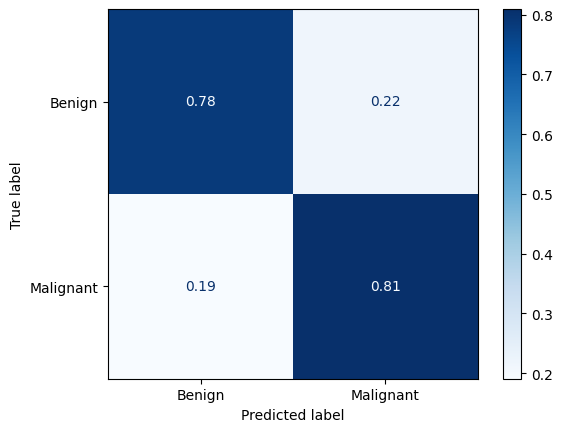

In [157]:
#  Hiển thị theo phần trăm class
plt.figure(figsize=(5, 5))
plot_confusion_matrix(model_tree, X_test, y_test, display_labels=target_names, cmap=plt.cm.Blues, normalize='true')
plt.show()

<Figure size 500x500 with 0 Axes>

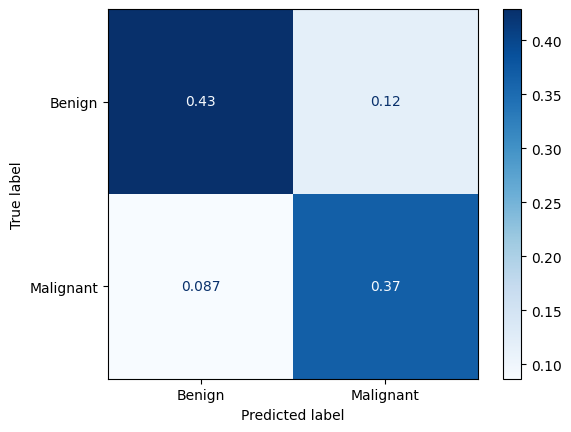

In [158]:
#  Hiển thị theo phần trăm tất cả 
plt.figure(figsize=(5, 5))
plot_confusion_matrix(model_tree, X_test, y_test, display_labels=target_names, cmap=plt.cm.Blues, normalize='all')
plt.show()

> Lưu mô hình

In [159]:
#  Lưu mô hình
import pickle
pickle.dump(model_tree, open(path + 'model_tree.pkl', 'wb'))

## **5. Bệnh nhân với các thông số như sau:** 

- Age: 20 tuổi;
- Shape: Round;
- Margin: Circumscribed
- Density: Low

> Sử dụng model ở trên dự đoán xem bệnh nhân này bị u lành tính (0) hay ác tính (1)

---

### **Xem lại các thông số sau khi đã chuyển dạng số**

<table style="width: 100%">
    <tr>
        <th>Age</th>
        <th>Shape</th>
        <th>Margin</th>
        <th>Density</th>
    </tr>
    <tr>
        <td>Từ 17 - 34 : --> Age = 0</td>
        <td>Irregular = 0</td>
        <td>Circumscribed = 0</td>
        <td>Low  = 0</td>
    </tr>
    <tr>
        <td>Từ 33 - 49 : --> Age = 1</td>
        <td>Round = 1</td>
        <td>ill-defined = 1</td>
        <td>Iso = 1</td>
    </tr>
    <tr>
        <td>Từ 49 - 64 : --> Age = 2</td>
        <td>Oval = 2</td>
        <td>Spiculated = 2</td>
        <td>High = 2</td>
    </tr>
    <tr>
        <td>Từ 64 - 80 : --> Age = 3</td>
        <td>Lobular = 3</td>
        <td>Obscured = 3</td>
        <td>Fat-containing = 3</td>
    </tr>
    <tr>
        <td>lớn hơn 80 : --> Age = 4</td>
        <td></td>
        <td>Microlobulated = 4</td>
        <td></td>
    </tr>    
</table>


In [160]:
#  Muốn chạy thẳng thì chạy import trc
#  Viết class để dự đoán
class PredictBreastCancer:
    def __init__(self, Age, Shape, Margin, Density):
        self.Age = Age
        self.Shape = Shape
        self.Margin = Margin
        self.Density = Density
        self.MODUL = pickle.load(open(path + 'model_tree.pkl', 'rb'))
        self.LIST_AGE_CONVERT = [[17,34],[34,49], [49,64], [64,80], [80,'>']]
        self.LIST_SHAPE_CONVERT = ['Irregular', 'Round', 'Oval', 'Lobular']
        self.LIST_MARGIN_CONVERT = ['Circumscribed', 'Ill-defined', 'Spiculated', 'Obscured', 'Microlobulated' ]
        self.LIST_DENSITY_CONVERT = ['Low', 'Iso', 'High', 'Fat-containing']
        self.LIST_TARGET_CONVERT = ['Benign - Lành tính', 'Malignant - Ác tính']
    def convert(self, value, list_convert):
        if value in list_convert:
            return list_convert.index(value)
        elif value == self.Age:
            for i in list_convert:
                if i[1] == '>':
                    return list_convert.index(i)
                elif value >= i[0] and value < i[1]:
                    return list_convert.index(i)
    def input(self, value):
        while True:
            try:
                if value == self.Age:
                    value_temp = int(input(f'Nhập {value}: '))
                    if value_temp < 17 or value_temp > 80:
                        raise ValueError
                    return value_temp
                else:
                    value_temp = input(f'Nhập {value}: ')
                
                if value_temp in self.LIST_SHAPE_CONVERT:
                    return value_temp
                elif value_temp in self.LIST_MARGIN_CONVERT:
                    return value_temp
                elif value_temp in self.LIST_DENSITY_CONVERT:
                    return value_temp
                else:
                    print('Nhập sai, vui lòng nhập lại')
            except:
                print('Vui lòng nhập số!')
    
    def Return(self):
        self.Age = self.convert(self.Age, self.LIST_AGE_CONVERT)
        self.Shape = self.convert(self.Shape, self.LIST_SHAPE_CONVERT)
        self.Margin = self.convert(self.Margin, self.LIST_MARGIN_CONVERT)
        self.Density = self.convert(self.Density, self.LIST_DENSITY_CONVERT)
        X = [[self.Age, self.Shape, self.Margin, self.Density]]
        y_pred = self.MODUL.predict(X) # Kết quả trả lại là cái list
        return print(f'Kết quả khám của bạn : {self.LIST_TARGET_CONVERT[y_pred[0]]}')
    
    def Run(self):
        self.Age = self.input(self.Age)
        self.Shape = self.input(self.Shape)
        self.Margin = self.input(self.Margin)
        self.Density = self.input(self.Density)
        self.Return()

In [161]:
#  Dự đoán
PredictBreastCancer(20, 'Round', 'Circumscribed', 'Low').Return()

Kết quả khám của bạn : Benign - Lành tính


In [169]:
PredictBreastCancer(70, 'Lobular', 'Spiculated', 'Low').Return()

Kết quả khám của bạn : Malignant - Ác tính


In [164]:
#  Chạy thử
PredictBreastCancer('Age', 'Shape', 'Margin', 'Density').Run()

Kết quả khám của bạn : Benign - Lành tính
